# Explore here

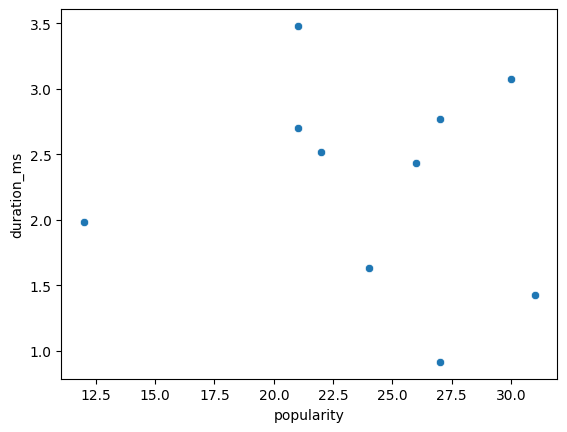

In [17]:
import os
import pandas as pd
from dotenv import load_dotenv
import seaborn as sns
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()


client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


conexion = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

id_artista = "1yLrA8a9c6qikBV0THGnux"

response = conexion.artist_top_tracks("1yLrA8a9c6qikBV0THGnux")
if response:
  # 
  tracks = response["tracks"]
  # 
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

